In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [2]:
import yfinance as yf
import datetime

ticker = 'IDFCFIRSTB.NS'
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2024, 4, 9)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,54.400002,55.400002,54.250000,54.849998,53.733650,4483875
2018-01-02,55.000000,55.200001,53.750000,53.950001,52.851967,4912922
2018-01-03,54.299999,54.599998,54.000000,54.150002,53.047897,3088116
2018-01-04,54.200001,54.700001,53.900002,54.549999,53.439754,3665726
2018-01-05,54.650002,58.799999,54.650002,58.250000,57.064449,24488254
...,...,...,...,...,...,...
2024-04-02,77.500000,79.449997,77.050003,79.150002,79.150002,46916727
2024-04-03,78.800003,78.949997,78.150002,78.400002,78.400002,41884727
2024-04-04,79.000000,80.099998,78.550003,79.449997,79.449997,51797671


In [4]:
df.shape

(1547, 6)

<h1><b>Closing Price Prediction<b></h1>

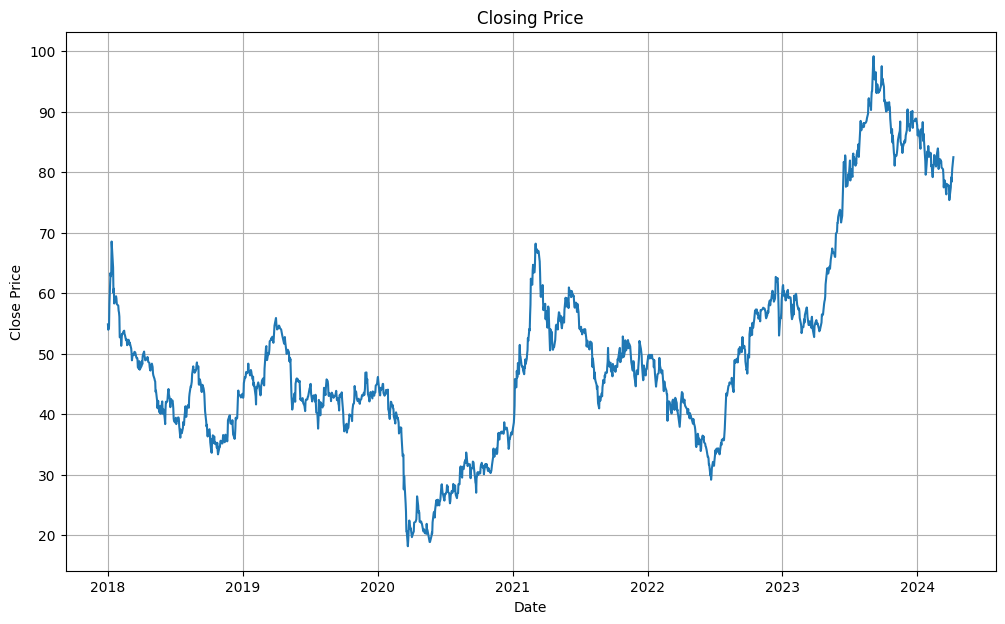

In [5]:
plt.figure(figsize=(12, 7))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [6]:
import math
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1238

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45280691],
       [0.44170268],
       [0.4441703 ],
       ...,
       [0.75632325],
       [0.77112898],
       [0.79395438]])

In [8]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(80, len(train_data)):
    x_train.append(train_data[i-80:i,0])
    y_train.append(train_data[i,0])
    if i<=80:
        print(x_train)
        print(y_train)
        print()

[array([0.45280691, 0.44170268, 0.4441703 , 0.4491055 , 0.49475634,
       0.55768045, 0.55089452, 0.55644666, 0.62183843, 0.60888343,
       0.56878472, 0.51696485, 0.5256015 , 0.49537324, 0.50030848,
       0.5083282 , 0.51017892, 0.50586062, 0.49413945, 0.49105493,
       0.48056755, 0.47686614, 0.46822949, 0.4262801 , 0.42936462,
       0.40900679, 0.42011107, 0.43306603, 0.43244913, 0.43800127,
       0.43985195, 0.43306603, 0.4312153 , 0.42072796, 0.42011107,
       0.42196175, 0.41024063, 0.41702655, 0.42134486, 0.41826034,
       0.41147442, 0.41579272, 0.40345466, 0.39481805, 0.37939547,
       0.3861814 , 0.39235043, 0.38988281, 0.39481805, 0.39666873,
       0.39605184, 0.39543494, 0.38494756, 0.38371377, 0.38433067,
       0.38186305, 0.36520668, 0.36212216, 0.37754474, 0.36027144,
       0.3676743 , 0.37754474, 0.37137571, 0.38679829, 0.39111659,
       0.39728563, 0.38803208, 0.3855645 , 0.37939547, 0.38001236,
       0.38124615, 0.38247999, 0.3861814 , 0.38494756, 0.3763

In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1158, 80, 1)

<h1><b>Model Training<b></h1>

In [11]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1),activation='relu'))
#Add second layer to model
model.add(LSTM(50, return_sequences=False,activation='relu'))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=50)

Epoch 1/50
1158/1158 [==============================] - 40s 33ms/step - loss: 0.0025
Epoch 2/50
1158/1158 [==============================] - 40s 34ms/step - loss: 7.3094e-04
Epoch 3/50
1158/1158 [==============================] - 38s 33ms/step - loss: 5.5775e-04
Epoch 4/50
1158/1158 [==============================] - 38s 33ms/step - loss: 5.3158e-04
Epoch 5/50
1158/1158 [==============================] - 38s 33ms/step - loss: 4.5557e-04
Epoch 6/50
1158/1158 [==============================] - 38s 33ms/step - loss: 4.2473e-04
Epoch 7/50
1158/1158 [==============================] - 38s 33ms/step - loss: 3.7675e-04
Epoch 8/50
1158/1158 [==============================] - 38s 33ms/step - loss: 3.7011e-04
Epoch 9/50
1158/1158 [==============================] - 38s 33ms/step - loss: 3.1942e-04
Epoch 10/50
1158/1158 [==============================] - 38s 33ms/step - loss: 3.4579e-04
Epoch 11/50
1158/1158 [==============================] - 38s 33ms/step - loss: 3.1486e-04
Epoch 12/50
1158/1158 [

<h1><b>Testing and Validating Model<b></h1>

In [ ]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-80: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(80, len(test_data)):
    x_test.append(test_data[i-80:i,0])

In [ ]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [ ]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions


In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(12,7))
plt.title(f'LSTM Result')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'] , color='blue')
plt.plot(valid[ 'predictions'] ,marker='o', linestyle='dashed', color='green')
plt.plot(valid['Close'] , color='red')
plt.legend(['Train','Validation', 'predictions'])
plt.grid(True)
plt.savefig(f'lstm.{ticker}.png')
plt.show()

In [ ]:
#Show the valid and predicted prices

valid.tail(20)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse =np.sqrt(np.mean(predictions-y_test)**2)



print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))


# Assuming y_test and predictions are already defined
smape = symmetric_mean_absolute_percentage_error(y_test, predictions)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)



<h1><b>Getting Predictions for 60 days from now<b></h1>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Assuming you have the necessary imports and the 'model' and 'scaler' objects are defined

# Get the historical stock data

stock_quote = yf.download(ticker, start=start_date, end=end_date)

# Extract 'Close' prices
new_df = stock_quote.filter(['Close'])

# Take the last 60 days of 'Close' prices and scale them
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list to store predicted prices and dates
predicted_prices = []
predicted_dates = []

# Number of days to forecast (adjust as needed)
forecast_days = 60

# Loop through the forecast period
for i in range(forecast_days):
    # Reshape the data for prediction
    X_test = np.array([last_60_days_scaled])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)

    # Append the predicted price to the list
    predicted_prices.append(pred_price[0, 0])

    # Get the corresponding date for the prediction
    next_date = stock_quote.index[-1] + pd.DateOffset(days=i + 1)
    predicted_dates.append(next_date)

    # Update last_60_days for the next iteration
    last_60_days = np.append(last_60_days[1:], [pred_price[0]], axis=0)
    last_60_days_scaled = scaler.transform(last_60_days)

# Create a DataFrame to display the results
predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted_Close_Price': predicted_prices})



# Save the predicted results to a CSV file with the ticker in the name
csv_filename = f'pred.lstm.{ticker}.csv'
predicted_df.to_csv(csv_filename, index=False)

print(f'Predicted prices saved to {csv_filename}')


In [ ]:
import matplotlib.pyplot as plt

# Plotting historical data
plt.figure(figsize=(12, 7))
plt.plot(stock_quote.index, stock_quote['Close'], label='Historical Close Prices')

# Plotting predicted data
plt.plot(predicted_df['Date'], predicted_df['Predicted_Close_Price'], label='Predicted Close Prices')

# Adding labels and title
plt.title(f'Historical and Predicted Closing Prices for {ticker} Bank')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Plotting historical data
plt.figure(figsize=(12, 7))
plt.plot(stock_quote.index, stock_quote['Close'], label='Historical Close Prices')

# Plotting predicted data
start_date = stock_quote.index[-1] + pd.Timedelta(days=1)
end_date = stock_quote.index[-1] + pd.Timedelta(days=60)
predicted_dates = pd.date_range(start=start_date, end=end_date, freq='D')
plt.plot(predicted_dates, predicted_df['Predicted_Close_Price'], label='Predicted Close Prices')

# Adding labels and title
plt.title(f'{ticker} Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.savefig(f'prediction.lstm_{ticker}.NS.png')
plt.show()